<a href="https://colab.research.google.com/github/kajalkattige30/DLProject/blob/main/TrafficSignRecognitionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO :

1. Pick a dataset
2. Download the dataset
3. Import the dataset using pytorch
4. Explore the dataset
5. Prepare the dataset for training.

Download the dataset

Using the opendatasets library, download the dataset from https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


In [3]:
!pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

In [6]:
od.download(dataset_url, force = True) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kajalkattige
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:05<00:00, 125MB/s]


### Import dataset into pytorch

In [7]:
dir = './gtsrb-german-traffic-sign/Train'

In [8]:
import os

In [9]:
os.listdir(dir)

['34',
 '15',
 '3',
 '21',
 '37',
 '30',
 '16',
 '7',
 '36',
 '26',
 '17',
 '14',
 '13',
 '1',
 '27',
 '42',
 '9',
 '18',
 '41',
 '31',
 '23',
 '10',
 '8',
 '22',
 '33',
 '2',
 '4',
 '19',
 '35',
 '11',
 '6',
 '24',
 '40',
 '20',
 '5',
 '38',
 '39',
 '29',
 '25',
 '0',
 '28',
 '12',
 '32']

In [10]:
len(os.listdir(dir))

43

There are 43 classes in total.

#### Loading the dataset into pytorch

In [11]:
from torchvision.datasets import  ImageFolder

In [12]:
dataset = ImageFolder(dir)

In [13]:
len(dataset)

39209

Dataset contains 39209 images of traffic signs.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

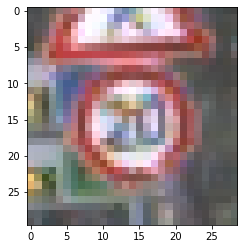

In [15]:
img, label = dataset[0]
plt.imshow(img)

Above plot shows image of dataset[0] before any transformation.

Code to apply trasformations -

To view it as a pytorch tensor -

tt.Compose is used to apply a bunch of transformations in order. When we are building a deep learning model, we need all the images to be of the same size. We are using randomCrop because this will crop the images randomly and introduce some randomization into the dataset.

In [16]:
import torchvision.transforms as tt
dataset = ImageFolder(dir, tt.Compose([tt.Resize(224), tt.RandomCrop(224), tt.ToTensor()]))

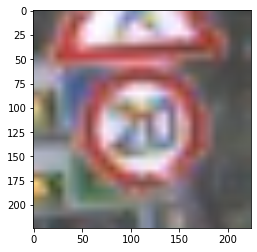

In [17]:
img, label = dataset[0]
plt.imshow(img.permute(1, 2, 0))

Above plot shows image of dataset[o] after applying transformations.

#### Splitting the dataset into two parts - Validation and Training dataset.

In [18]:
val_percent = 0.1
val_size = int(val_percent*len(dataset))
train_size = len(dataset) - val_size
train_size, val_size

(35289, 3920)

In [19]:
from torch.utils.data import random_split

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset), len(val_dataset)

(35289, 3920)

Next step is to create dataloaders, to work with data in batches.

For validation dataset, there's no requirement of shuffling.

In [20]:
from torch.utils.data import DataLoader
batch_size = 256
train_DataLoader = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_DataLoader = DataLoader(val_dataset, batch_size, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


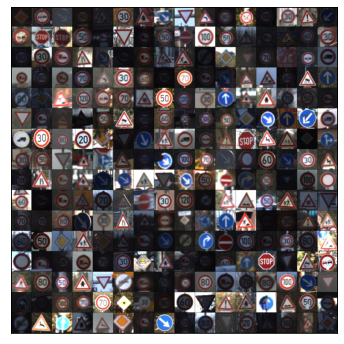

In [22]:
show_batch(train_DataLoader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


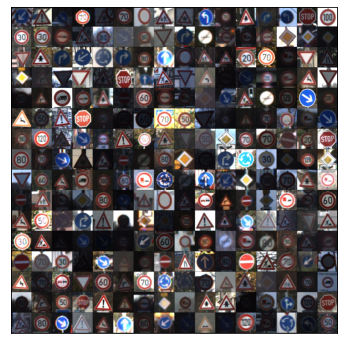

In [23]:
show_batch(val_DataLoader)

### Utility Functions and Classes
GPU utilities

We have some helper functions to move the data onto the gpu.



In [3]:
import torch
def get_default_device(): # This function is going to pick a gpu if one is available, otherwise it's going to pick a cpu, it will give a pointer to a device based on what is available.
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device): # This function is used to move data to a particular device.
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(): # This function is used to wrap dataloaders so that when batches of data are being requested, they are dynamically loaded onto the gpu
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

To check if gpu is available

In [38]:
import torch
torch.cuda.is_available()

False

In [1]:
import torch
torch.cuda.is_available()

True

To find device:

In [4]:
device = get_default_device()
device

device(type='cuda')